<a href="https://colab.research.google.com/github/CA683-Group99/Covid_19_vis/blob/main/tests_virologiques_COVID_19_SI_DEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# @cath709 - France Covid-19 visualisations from Open Source Data Colab

In [461]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



# Tests

Données relatives aux résultats des tests virologiques COVID-19 SI-DEP
This dataset comes from a certified public service

https://www.data.gouv.fr/en/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

Licence Ouverte / Open Licence



```

Colonne	Type	Description_FR	Description_EN	Exemple
dep	String	Departement	State	01
reg	String	Region	region	2.0
fra	String	France	France	FR
jour	Date	Jour	Day	2020-05-13
week	Date	Semaine	Week	2020-S21
pop	integer	Population de reference (du departement, de la région, nationale)	Reference population (department, region, national)	656955.0
t	integer	Nombre de test réalisés	Number of tests performed	2141.0
cl_age90	integer	Classe d'age	Age class	09
p	integer	Nombre de test positifs	Number of positive tests	34.0
p_h	integer	Nombre de test positif chez les hommes	Number of positive test in men	1688.0
t_h	integer	Nombre de test effectués chez les hommes	Number of tests performed on men	93639.0
p_f	integer	Nombre de test positif chez les femmes	Number of positive test in women	2415.0
t_f	integer	Nombre de test effectués chez les femmes	Number of tests performed on women	122725.0
```



In [462]:
rollingWindow = 7

## France

In [463]:
sp_quot_fra_url = 'https://www.data.gouv.fr/en/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c'
s = requests.get(sp_quot_fra_url).content
sp_fra_ds = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=';')

sp_fra_ds

,fra,jour,P_f,P_h,P,T_f,T_h,T,cl_age90,pop
0,FR,2020-05-13,7,6,13,601,649,1282,9,8e+06
1,FR,2020-05-13,21,7,28,859,810,1689,19,8e+06
2,FR,2020-05-13,64,41,105,2789,1865,4675,29,7e+06
3,FR,2020-05-13,66,43,109,3394,2322,5729,39,8e+06
4,FR,2020-05-13,62,40,102,3588,2294,5896,49,9e+06
...,...,...,...,...,...,...,...,...,...,...
6243,FR,2021-12-01,2095,1818,3944,30413,24996,55948,69,8e+06
6244,FR,2021-12-01,982,947,1941,18439,16386,35039,79,6e+06
6245,FR,2021-12-01,444,283,732,10668,6891,17628,89,3e+06
6246,FR,2021-12-01,207,79,287,5827,2086,7928,90,9e+05


In [464]:
sp_fra_ds.cl_age90.unique()

array([ 9, 19, 29, 39, 49, 59, 69, 79, 89, 90,  0])

In [465]:
pivot_df = sp_fra_ds.pivot(index='jour', columns='cl_age90', values='P')
pivot_df

cl_age90,0,9,19,29,39,49,59,69,79,89,90
jour,,,,,,,,,,,
2020-05-13,901,13,28,105,109,102,117,92,90,121,114
2020-05-14,1015,19,42,116,113,121,129,86,84,166,119
2020-05-15,1044,16,41,134,131,115,128,91,104,162,115
2020-05-16,292,10,13,37,27,39,32,22,27,48,37
2020-05-17,142,6,4,17,12,14,18,16,16,22,17
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,27183,3866,3876,3032,4694,4321,3219,2376,1232,434,132
2021-11-28,6626,881,892,861,1287,1140,681,426,217,163,75
2021-11-29,58440,8666,8249,6313,10094,9205,6980,5060,2602,902,366


In [466]:
age_cols = [9, 19, 29, 39, 49, 59, 69, 79, 89, 90]
new_age_cols = ['P0_9', 'P10_19', 'P20_29', 'P30_39', 'P40_49', 'P50_59', 'P60_69', 'P70_79', 'P80_89', 'P90+']

pivot_df.rename(columns={9: 'P0_9'}, inplace=True)
pivot_df.rename(columns={19: 'P10_19'}, inplace=True)
pivot_df.rename(columns={29: 'P20_29'}, inplace=True)
pivot_df.rename(columns={39: 'P30_39'}, inplace=True)
pivot_df.rename(columns={49: 'P40_49'}, inplace=True)
pivot_df.rename(columns={59: 'P50_59'}, inplace=True)
pivot_df.rename(columns={69: 'P60_69'}, inplace=True)
pivot_df.rename(columns={79: 'P70_79'}, inplace=True)
pivot_df.rename(columns={89: 'P80_89'}, inplace=True)
pivot_df.rename(columns={90: 'P90+'}, inplace=True)


fig = go.Figure()

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    #subplot_titles=(" Tests", )
    )

for col in new_age_cols:
  fig.add_trace(go.Trace(x=pivot_df.index, y=pivot_df[col], name=(col),  hovertext='label',
                    ),
              1, 1, secondary_y=False)
  
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [467]:
fra_ds = sp_fra_ds[(sp_fra_ds.cl_age90 == 0)].copy()
fra_ds = fra_ds.reset_index()

fra_ds.rename(columns={'jour':'date'}, inplace=True)


fra_ds['rolling_new_cases'] = fra_ds['P'].rolling(window=rollingWindow).mean()
fra_ds['rolling_new_tests'] = fra_ds['T'].rolling(window=rollingWindow).mean()
fra_ds['sum_new_cases14'] = fra_ds['P'].rolling(window=14).sum()

fra_ds["rolling_positive_rate"] = np.round(((fra_ds["rolling_new_cases"] * 100)  / (fra_ds['rolling_new_tests'])), 1)

fra_ds['incidence14'] = np.round((fra_ds["sum_new_cases14"] / (fra_ds['pop'] / 100000)), 1)

fra_ds

,index,fra,date,P_f,P_h,P,T_f,T_h,T,cl_age90,pop,rolling_new_cases,rolling_new_tests,sum_new_cases14,rolling_positive_rate,incidence14
0,10,FR,2020-05-13,537,361,901,23355,16303,39839,0,7e+07,NaN,NaN,NaN,NaN,NaN
1,21,FR,2020-05-14,562,419,1015,25335,17594,43174,0,7e+07,NaN,NaN,NaN,NaN,NaN
2,32,FR,2020-05-15,564,446,1044,27496,20446,48380,0,7e+07,NaN,NaN,NaN,NaN,NaN
3,43,FR,2020-05-16,160,131,292,9220,7342,16662,0,7e+07,NaN,NaN,NaN,NaN,NaN
4,54,FR,2020-05-17,78,64,142,3448,3168,6650,0,7e+07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,6203,FR,2021-11-27,14239,12525,27183,279628,256855,546699,0,7e+07,29529,551443,335413,5,500
564,6214,FR,2021-11-28,3550,2973,6626,58064,51906,112804,0,7e+07,29870,556223,339124,5,505
565,6225,FR,2021-11-29,30601,27016,58440,452893,385545,852050,0,7e+07,32927,590133,373909,6,557
566,6236,FR,2021-11-30,24978,21990,47625,430194,367780,811071,0,7e+07,35215,620213,402223,6,599


In [468]:
fig = go.Figure()

fig = make_subplots(
    rows=3, cols=1,
    specs=[[{"secondary_y": True}],[{"secondary_y": True}],[{"secondary_y": True}]],
    subplot_titles=(" Tests", ))

fig.add_trace(go.Bar(x=fra_ds.date, y=fra_ds['T'], name=('Tests '),  hovertext='label',
                  ),
            1, 1, secondary_y=False)
fig.add_trace(go.Scatter(x=fra_ds.date, y=fra_ds['rolling_new_tests'], name=('rolling_new_tests '),  hovertext='label', mode='lines',
                  ),
            1, 1, secondary_y=False)

fig.add_trace(go.Bar(x=fra_ds.date, y=fra_ds['P'], name=('Positive '),  hovertext='label',
                  ),
            2, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=fra_ds.date, y=fra_ds['rolling_new_cases'], name=('rolling_new_cases '),  hovertext='label', mode='lines',
                  ),
            2, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=fra_ds.date, y=fra_ds['incidence14'], name=('incidence14 '),  hovertext='label', mode='lines',
                  ),
            2, 1, secondary_y=True)


fig.add_trace(go.Scatter(x=fra_ds.date, y=fra_ds['rolling_positive_rate'], name=('rolling_positive_rate '),  hovertext='label', mode='lines',
                  ),
            3, 1, secondary_y=False)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="France: ",
                  width=1200, height=800)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')

## Departements

In [469]:
    
sp_quot_dep_url = "https://www.data.gouv.fr/en/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675"

s = requests.get(sp_quot_dep_url).content
sp_dep_ds = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=';')

sp_dep_ds

,dep,jour,P,T,cl_age90,pop
0,1,2020-05-13,0,16,9,83001
1,1,2020-05-13,1,17,19,84665
2,1,2020-05-13,0,34,29,65496
3,1,2020-05-13,1,72,39,85588
4,1,2020-05-13,0,54,49,89678
...,...,...,...,...,...,...
649787,978,2021-12-01,0,20,69,3060
649788,978,2021-12-01,1,9,79,1153
649789,978,2021-12-01,0,0,89,346
649790,978,2021-12-01,0,0,90,71


In [470]:
sp_dep_ds.cl_age90.unique()
totPperage = sp_dep_ds.groupby(['cl_age90', 'jour']).P.sum()
totPperage

cl_age90  jour      
0         2020-05-13     889
          2020-05-14    1001
          2020-05-15    1026
          2020-05-16     291
          2020-05-17     141
                        ... 
90        2021-11-27     131
          2021-11-28      75
          2021-11-29     366
          2021-11-30     310
          2021-12-01     286
Name: P, Length: 6248, dtype: int64

In [471]:
sp_dep_ds.dep.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       21, 22, '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
       '41', 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 971, 972, 973, 974, 975, 976, 977, 978],
      dtype=object)

In [472]:
sp_dep_ds.dep = sp_dep_ds.dep.astype('string') 

In [473]:
sp_dep_ds.loc[sp_dep_ds.dep == '29']

,dep,jour,P,T,cl_age90,pop
168696,29,2020-05-13,0,9,9,91260
168697,29,2020-05-13,1,12,19,110072
168698,29,2020-05-13,0,25,29,90029
168699,29,2020-05-13,0,32,39,99828
168700,29,2020-05-13,0,27,49,113799
...,...,...,...,...,...,...
174939,29,2021-12-01,35,610,69,124507
174940,29,2021-12-01,16,432,79,86506
174941,29,2021-12-01,11,212,89,53501
174942,29,2021-12-01,8,69,90,13543


In [474]:
totPperage = totPperage.reset_index()

totPperage.loc[totPperage.jour == "2020-08-18"]

,cl_age90,jour,P
97,0,2020-08-18,4697
665,9,2020-08-18,133
1233,19,2020-08-18,469
1801,29,2020-08-18,1581
2369,39,2020-08-18,880
2937,49,2020-08-18,624
3505,59,2020-08-18,497
4073,69,2020-08-18,277
4641,79,2020-08-18,125
5209,89,2020-08-18,72


In [475]:
pivot_df = sp_dep_ds.pivot(index=['jour', 'dep'], columns='cl_age90', values='P')

age_cols = [9, 19, 29, 39, 49, 59, 69, 79, 89, 90]
new_age_cols = ['P0_9', 'P10_19', 'P20_29', 'P30_39', 'P40_49', 'P50_59', 'P60_69', 'P70_79', 'P80_89', 'P90+']

pivot_df.rename(columns={9: 'P0_9'}, inplace=True)
pivot_df.rename(columns={19: 'P10_19'}, inplace=True)
pivot_df.rename(columns={29: 'P20_29'}, inplace=True)
pivot_df.rename(columns={39: 'P30_39'}, inplace=True)
pivot_df.rename(columns={49: 'P40_49'}, inplace=True)
pivot_df.rename(columns={59: 'P50_59'}, inplace=True)
pivot_df.rename(columns={69: 'P60_69'}, inplace=True)
pivot_df.rename(columns={79: 'P70_79'}, inplace=True)
pivot_df.rename(columns={89: 'P80_89'}, inplace=True)
pivot_df.rename(columns={90: 'P90+'}, inplace=True)

pivot_df

cl_age90          0  P0_9  P10_19  P20_29  ...  P60_69  P70_79  P80_89  P90+
jour       dep                             ...                              
2020-05-13 1      9     0       1       0  ...       0       1       4     2
           10     3     0       0       1  ...       0       0       1     0
           11    13     0       0       3  ...       0       1       3     5
           12     2     0       0       0  ...       0       0       0     2
           13    63     1       1       5  ...       2      12      14    10
...             ...   ...     ...     ...  ...     ...     ...     ...   ...
2021-12-01 974  424    56      85      51  ...      28      11       1     5
           975    0     0       0       0  ...       0       0       0     0
           976    9     1       0       4  ...       0       0       0     0
           977    2     0       0       1  ...       0       0       0     0
           978    2     0       0       0  ...       0       1       0     0

[59072 rows x 11 columns]

In [476]:
pivot_df = pivot_df.reset_index()

pivot_df.rename(columns={'jour':'date'}, inplace=True)

In [477]:
dep_pivot_df = pivot_df.loc[pivot_df.dep == '13']

fig = go.Figure()

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    #subplot_titles=(" Tests", )
    )

for col in new_age_cols:
  fig.add_trace(go.Trace(x=dep_pivot_df.date, y=dep_pivot_df[col], name=(col),  hovertext='label',
                    ),
              1, 1, secondary_y=False)
  
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

COVID-19 : Taux d’incidence pour 100 000 habitants par département sur les 7 derniers jours consolidés.

Ce taux représente le nombre de nouveaux cas de COVID-19 diagnostiqués par une PCR SARS-CoV-2 survenus sur les 7 derniers jours dont les données sont consolidées (J-9 à J-3), rapportés au nombre d’habitants de chaque département.

In [478]:
# Total number per Departement
dep_ds = sp_dep_ds[(sp_dep_ds.cl_age90 == 0)].copy()
dep_ds = dep_ds.reset_index()

dep_ds.rename(columns={'jour':'date'}, inplace=True)



In [479]:
deps = dep_ds.dep.unique()

In [480]:
# merge departement total with per age group columnm
dep_ds.reset_index()

left = dep_ds.set_index(['date', 'dep'])
right = pivot_df.set_index(['date', 'dep'])
dep_ds = left.join(right, rsuffix='age')



In [481]:
dep_ds = dep_ds.reset_index()

In [482]:
bdr_ds = dep_ds.loc[dep_ds.dep == '13']

In [483]:
bdr_ds['rolling_new_cases'] = bdr_ds.loc[:,['P']].rolling(window=rollingWindow).mean()
bdr_ds['rolling_new_tests'] = bdr_ds.loc[:,['T']].rolling(window=rollingWindow).mean()



In [484]:
bdr_ds

,date,dep,index,P,T,cl_age90,pop,0,P0_9,P10_19,P20_29,P30_39,P40_49,P50_59,P60_69,P70_79,P80_89,P90+,rolling_new_cases,rolling_new_tests
6816,2020-05-13,13,74986,63,3195,0,2e+06,63,1,1,5,7,2,8,2,12,14,10,NaN,NaN
6817,2020-05-14,13,74997,50,3205,0,2e+06,50,1,3,4,4,4,4,4,8,8,9,NaN,NaN
6818,2020-05-15,13,75008,48,3194,0,2e+06,48,0,0,6,4,5,7,2,7,7,9,NaN,NaN
6819,2020-05-16,13,75019,13,1059,0,2e+06,13,0,1,3,0,0,0,1,3,1,4,NaN,NaN
6820,2020-05-17,13,75030,3,376,0,2e+06,3,0,0,0,0,0,1,1,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,2021-11-27,13,81179,1170,22049,0,2e+06,1170,143,188,141,215,199,140,78,42,18,6,1366,23351
7380,2021-11-28,13,81190,462,6186,0,2e+06,462,55,72,53,94,75,55,24,14,12,8,1397,23556
7381,2021-11-29,13,81201,2562,38231,0,2e+06,2562,297,422,264,428,447,334,214,106,34,16,1496,25006
7382,2021-11-30,13,81212,1937,31706,0,2e+06,1937,230,302,227,348,328,218,156,84,34,10,1555,25809


In [485]:
bdr_ds.dtypes

date                  object
dep                   object
index                  int64
P                      int64
T                      int64
cl_age90               int64
pop                  float64
0                      int64
P0_9                   int64
P10_19                 int64
P20_29                 int64
P30_39                 int64
P40_49                 int64
P50_59                 int64
P60_69                 int64
P70_79                 int64
P80_89                 int64
P90+                   int64
rolling_new_cases    float64
rolling_new_tests    float64
dtype: object

In [486]:
# Bouches du Rhone

fig = go.Figure()

fig = make_subplots(
    rows=3, cols=1,
    specs=[[{"secondary_y": True}],[{"secondary_y": True}],[{"secondary_y": True}]],
    subplot_titles=(" Tests", ))

fig.add_trace(go.Bar(x=bdr_ds.date, y=bdr_ds['T'], name=('Tests '),  hovertext='label',
                   ),
             1, 1, secondary_y=False)
fig.add_trace(go.Scatter(x=bdr_ds.date, y=bdr_ds['rolling_new_tests'], name=('rolling_new_tests '),  hovertext='label', mode='lines',
                   ),
             1, 1, secondary_y=False)

fig.add_trace(go.Bar(x=bdr_ds.date, y=bdr_ds['P'], name=('Positive '),  hovertext='label',
                   ),
             2, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=bdr_ds.date, y=bdr_ds['rolling_new_cases'], name=('rolling_new_cases '),  hovertext='label', mode='lines',
                   ),
             2, 1, secondary_y=False)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Bouches du Rhone",
                  width=800, height=500)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

Estimation de la population au 1ᵉʳ janvier 2020
Séries par région, département, sexe et âge de 1975 à 2020
https://www.insee.fr/fr/statistiques/1893198

In [487]:
pop = pd.read_csv("/content/drive/My Drive/virus/estim-pop-dep-sexe-gca-2021.csv", quotechar='"', thousands=',' , skiprows=4)
pop

,code,departement,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2
0,01,Ain,2e+05,2e+05,2e+05,1e+05,6e+04,7e+05,9e+04,8e+04,9e+04,5e+04,2e+04,3e+05,8e+04,8e+04,9e+04,6e+04,3e+04,3e+05
1,02,Aisne,1e+05,1e+05,1e+05,1e+05,5e+04,5e+05,7e+04,6e+04,7e+04,5e+04,2e+04,3e+05,6e+04,6e+04,7e+04,5e+04,3e+04,3e+05
2,03,Allier,7e+04,6e+04,8e+04,7e+04,5e+04,3e+05,3e+04,3e+04,4e+04,3e+04,2e+04,2e+05,3e+04,3e+04,4e+04,4e+04,3e+04,2e+05
3,04,Alpes-de-Haute-Provence,3e+04,3e+04,4e+04,4e+04,2e+04,2e+05,2e+04,2e+04,2e+04,2e+04,9e+03,8e+04,2e+04,2e+04,2e+04,2e+04,1e+04,9e+04
4,05,Hautes-Alpes,3e+04,3e+04,4e+04,3e+04,2e+04,1e+05,2e+04,1e+04,2e+04,1e+04,7e+03,7e+04,1e+04,1e+04,2e+04,2e+04,1e+04,7e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,976,Mayotte,2e+05,8e+04,4e+04,1e+04,3e+03,3e+05,8e+04,3e+04,2e+04,5e+03,1e+03,1e+05,8e+04,4e+04,2e+04,5e+03,1e+03,2e+05
102,DOM,NaN,7e+05,5e+05,6e+05,3e+05,1e+05,2e+06,3e+05,2e+05,3e+05,1e+05,5e+04,1e+06,3e+05,3e+05,3e+05,2e+05,8e+04,1e+06
103,France métropolitaine et DOM,NaN,2e+07,2e+07,2e+07,1e+07,6e+06,7e+07,8e+06,8e+06,9e+06,5e+06,3e+06,3e+07,8e+06,8e+06,9e+06,6e+06,4e+06,3e+07
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [488]:
pop['code'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95',
       'France métropolitaine ', '971', '972', '973', '974', '976', 'DOM',
       'France métropolitaine et DOM', nan,
       'Source : Insee - Estimations de population (résultats provisoires arrêtés en mars 2021).'],
      dtype=object)

In [489]:
pop['code'] = pop['code'].replace(['01', '02',  '03', '04', '05',  '06',  '07',  '08',  '09' ], ['1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [490]:
dep_ds.dtypes

date         object
dep          object
index         int64
P             int64
T             int64
cl_age90      int64
pop         float64
0             int64
P0_9          int64
P10_19        int64
P20_29        int64
P30_39        int64
P40_49        int64
P50_59        int64
P60_69        int64
P70_79        int64
P80_89        int64
P90+          int64
dtype: object

In [491]:
depds = []

for dep in deps:
  currdep = dep_ds.loc[dep_ds.dep == dep].copy()
  #print("Dep: " + dep + " count: " + str(len(currdep)))
  currdep['rolling_new_cases'] = currdep['P'].rolling(window=rollingWindow).mean()
  currdep['rolling_new_tests'] = currdep['T'].rolling(window=rollingWindow).mean()
  currdep['sum_new_cases14'] = currdep['P'].rolling(window=14).sum()

  currdep['rolling_P0_9_cases'] = currdep['P0_9'].rolling(window=rollingWindow).mean()
  currdep['rolling_P10_19_cases'] = currdep['P10_19'].rolling(window=rollingWindow).mean()


  depds.append(currdep)

newdf = pd.concat(depds, keys=deps)


In [492]:
pop.code.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', 'France métropolitaine ',
       '971', '972', '973', '974', '976', 'DOM',
       'France métropolitaine et DOM', nan,
       'Source : Insee - Estimations de population (résultats provisoires arrêtés en mars 2021).'],
      dtype=object)

In [493]:
newdf.reset_index()

left = newdf.set_index(['dep'])

pop.rename(columns={'code':'dep'}, inplace=True)

right = pop.set_index(['dep'])
newdf = left.join(right)

newdf.reset_index()

,dep,date,index,P,T,cl_age90,pop,0,P0_9,P10_19,P20_29,P30_39,P40_49,P50_59,P60_69,P70_79,P80_89,P90+,rolling_new_cases,rolling_new_tests,sum_new_cases14,rolling_P0_9_cases,rolling_P10_19_cases,departement,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2
0,1,2020-05-13,10,9,340,0,656955,9,0,1,0,1,0,0,0,1,4,2,NaN,NaN,NaN,NaN,NaN,Ain,168951,151533,180119,106335,55306,662244,87575,75551,89736,50980,22391,326233,81376,75982,90383,55355,32915,336011
1,1,2020-05-14,21,9,440,0,656955,9,0,6,1,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Ain,168951,151533,180119,106335,55306,662244,87575,75551,89736,50980,22391,326233,81376,75982,90383,55355,32915,336011
2,1,2020-05-15,32,5,454,0,656955,5,0,0,0,2,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,Ain,168951,151533,180119,106335,55306,662244,87575,75551,89736,50980,22391,326233,81376,75982,90383,55355,32915,336011
3,1,2020-05-16,43,0,151,0,656955,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Ain,168951,151533,180119,106335,55306,662244,87575,75551,89736,50980,22391,326233,81376,75982,90383,55355,32915,336011
4,1,2020-05-17,54,0,32,0,656955,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Ain,168951,151533,180119,106335,55306,662244,87575,75551,89736,50980,22391,326233,81376,75982,90383,55355,32915,336011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59067,978,2021-11-27,649747,3,185,0,35334,3,0,0,1,0,1,0,1,0,0,0,1,188,27,0,0e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59068,978,2021-11-28,649758,0,65,0,35334,0,0,0,0,0,0,0,0,0,0,0,1,193,27,0,0e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59069,978,2021-11-29,649769,6,261,0,35334,6,0,2,1,0,2,1,0,0,0,0,2,188,29,0,3e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59070,978,2021-11-30,649780,3,247,0,35334,3,0,0,0,0,0,1,0,2,0,0,2,196,32,0,3e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
newdf = newdf.reset_index()


In [495]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59072 entries, 0 to 59071
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dep                   59072 non-null  object 
 1   date                  59072 non-null  object 
 2   index                 59072 non-null  int64  
 3   P                     59072 non-null  int64  
 4   T                     59072 non-null  int64  
 5   cl_age90              59072 non-null  int64  
 6   pop                   59072 non-null  float64
 7   0                     59072 non-null  int64  
 8   P0_9                  59072 non-null  int64  
 9   P10_19                59072 non-null  int64  
 10  P20_29                59072 non-null  int64  
 11  P30_39                59072 non-null  int64  
 12  P40_49                59072 non-null  int64  
 13  P50_59                59072 non-null  int64  
 14  P60_69                59072 non-null  int64  
 15  P70_79             

In [496]:
newdf.loc[newdf.dep == '4']

,dep,date,index,P,T,cl_age90,pop,0,P0_9,P10_19,P20_29,P30_39,P40_49,P50_59,P60_69,P70_79,P80_89,P90+,rolling_new_cases,rolling_new_tests,sum_new_cases14,rolling_P0_9_cases,rolling_P10_19_cases,departement,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2
19312,4,2020-05-13,18754,1,99,0,165197,1,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19313,4,2020-05-14,18765,2,117,0,165197,2,1,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19314,4,2020-05-15,18776,1,94,0,165197,1,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19315,4,2020-05-16,18787,0,33,0,165197,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19316,4,2020-05-17,18798,0,19,0,165197,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19875,4,2021-11-27,24947,83,1180,0,165197,83,13,12,6,13,16,7,7,6,3,0,100,1423,988,12,13,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19876,4,2021-11-28,24958,11,257,0,165197,11,0,1,2,3,2,1,0,1,1,0,101,1430,993,12,12,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19877,4,2021-11-29,24969,219,2303,0,165197,219,38,37,17,35,36,27,16,8,3,2,112,1532,1164,16,15,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228
19878,4,2021-11-30,24980,193,2175,0,165197,193,36,37,13,30,26,24,17,6,4,0,123,1615,1317,19,19,Alpes-de-Haute-Provence,33799,30380,43459,36404,21660,165702,17756,15247,21035,17686,8750,80474,16043,15133,22424,18718,12910,85228


In [497]:
newdf.dtypes

dep                      object
date                     object
index                     int64
P                         int64
T                         int64
cl_age90                  int64
pop                     float64
0                         int64
P0_9                      int64
P10_19                    int64
P20_29                    int64
P30_39                    int64
P40_49                    int64
P50_59                    int64
P60_69                    int64
P70_79                    int64
P80_89                    int64
P90+                      int64
rolling_new_cases       float64
rolling_new_tests       float64
sum_new_cases14         float64
rolling_P0_9_cases      float64
rolling_P10_19_cases    float64
departement              object
0 à 19 ans              float64
20 à 39 ans             float64
40 à 59 ans             float64
60 à 74 ans             float64
75 ans et plus          float64
Total                   float64
0 à 19 ans.1            float64
20 à 39 

In [498]:
newdf.columns

Index([                 'dep',                 'date',                'index',
                          'P',                    'T',             'cl_age90',
                        'pop',                      0,                 'P0_9',
                     'P10_19',               'P20_29',               'P30_39',
                     'P40_49',               'P50_59',               'P60_69',
                     'P70_79',               'P80_89',                 'P90+',
          'rolling_new_cases',    'rolling_new_tests',      'sum_new_cases14',
         'rolling_P0_9_cases', 'rolling_P10_19_cases',          'departement',
                 '0 à 19 ans',          '20 à 39 ans',          '40 à 59 ans',
                '60 à 74 ans',       '75 ans et plus',                'Total',
               '0 à 19 ans.1',        '20 à 39 ans.1',        '40 à 59 ans.1',
              '60 à 74 ans.1',     '75 ans et plus.1',              'Total.1',
               '0 à 19 ans.2',        '20 à 39 ans.2

In [499]:
newdf["Over75_perc"] = np.round(((newdf["75 ans et plus"] * 100)  / (newdf['Total'] )) , 1)
newdf["rolling_positive_rate"] = np.round(((newdf["rolling_new_cases"] * 100)  / (newdf['rolling_new_tests'])), 1)

newdf['incidence14'] = np.round((newdf["sum_new_cases14"] / (newdf['Total'] / 100000)), 1)
newdf["incidence"] = np.round((newdf["rolling_new_cases"] * rollingWindow) / (newdf['Total'] / 100000), 1)
newdf['incidence14Progression'] = np.round((newdf['incidence14'].diff(14) * 100) / newdf['incidence14'], 1) 
newdf["I14ChangeSinceLastWeek%"] = np.round(newdf["incidence14"].diff(rollingWindow) / newdf["incidence14"] * 100)



In [500]:
newdf["incidence0_19"] = np.round(((newdf["rolling_P0_9_cases"] + newdf["rolling_P10_19_cases"]) * rollingWindow) / (newdf["0 à 19 ans"] / 100000), 1)

In [501]:
newdf.loc[:, ["date", "dep", "incidence0_19", "rolling_P0_9_cases", "rolling_P10_19_cases", "0 à 19 ans"]].head()

,date,dep,incidence0_19,rolling_P0_9_cases,rolling_P10_19_cases,0 à 19 ans
0,2020-05-13,1,NaN,NaN,NaN,168951
1,2020-05-14,1,NaN,NaN,NaN,168951
2,2020-05-15,1,NaN,NaN,NaN,168951
3,2020-05-16,1,NaN,NaN,NaN,168951
4,2020-05-17,1,NaN,NaN,NaN,168951


In [502]:
 
def plotDep(dep = '93'):
  fig = go.Figure()

  fig = make_subplots(
      rows=4, cols=1,
      specs=[[{"secondary_y": True}],[{"secondary_y": True}],[{"secondary_y": True}], [{"secondary_y": True}]],
      subplot_titles=(" Tests", ))

  depds = newdf.loc[newdf.dep == dep]

  fig.add_trace(go.Bar(x=depds.date, y=depds['T'], name=('Tests '),  hovertext='label',
                    ),
              1, 1, secondary_y=False)
  fig.add_trace(go.Scatter(x=depds.date, y=depds['rolling_new_tests'], name=('rolling_new_tests '),  hovertext='label', mode='lines',
                    ),
              1, 1, secondary_y=False)

  fig.add_trace(go.Bar(x=depds.date, y=depds['P'], name=('Positive '),  hovertext='label',
                    ),
              2, 1, secondary_y=False)

  fig.add_trace(go.Scatter(x=depds.date, y=depds['rolling_new_cases'], name=('rolling_new_cases '),  hovertext='label', mode='lines',
                    ),
              2, 1, secondary_y=False)

  fig.add_trace(go.Scatter(x=depds.date, y=depds['incidence14'], name=('incidence14 '),  hovertext='label', mode='lines',
                    ),
              2, 1, secondary_y=True)


  fig.add_trace(go.Scatter(x=depds.date, y=depds['rolling_positive_rate'], name=('rolling_positive_rate '),  hovertext='label', mode='lines',
                    ),
              3, 1, secondary_y=False)


  fig.add_trace(go.Scatter(x=depds.date, y=depds['rolling_P0_9_cases'], name=('rolling_P0_9_cases '),  hovertext='label', mode='lines',
                    ),
              4, 1, secondary_y=False)
 
  fig.add_trace(go.Scatter(x=depds.date, y=depds['rolling_P10_19_cases'], name=('rolling_P10_19_cases '),  hovertext='label', mode='lines',
                    ),
              4, 1, secondary_y=False)
   
  fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                    showlegend=True,
                    yaxis=dict(
                          title='Number of ',
                          titlefont_size=16,
                          tickfont_size=14,
                      ),
                    #yaxis_type="log",
                    title_text="Departement: " + str(dep),
                    width=1200, height=800)

  fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
  fig.show()

In [503]:
plotDep(dep = '93')


In [504]:
plotDep(dep = '13')

In [505]:
plotDep(dep = '4')

In [506]:
# Paris

fig = go.Figure()

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=(" Paris (75) 14-days incidence", ))

depds = newdf.loc[newdf.dep == '75']
recentds = depds.loc[depds.date > "2020-07-01"]
fig.add_trace(go.Bar(x=recentds.date, y=recentds['rolling_new_cases'], name=('Smoother new cases '),  hovertext='label'
                   ),
             1, 1, secondary_y=False)
fig.add_annotation(x="2020-10-18", y=1500, text="Paris Curfew")

fig.add_annotation(x="2020-10-29", y=1900, text="national lockdow")

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  #title_text="Dublin",
                  width=1000, height=500)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [507]:
# Dublin

fig = go.Figure()

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=(" Bouches du Rhone (Marseille) 14-days incidence", ))

depds = newdf.loc[newdf.dep == '13']
recentds = depds.loc[(depds.date > "2020-07-01") ]
fig.add_trace(go.Bar(x=recentds.date, y=recentds['incidence14'], name=('14-days incidence '),  hovertext='label',
                   ),
             1, 1, secondary_y=False)

fig.add_annotation(x="2020-09-27", y=440, text="Marseille Alerte Maximum")
fig.add_annotation(x="2020-10-18", y=600, text="Marseille Curfew")
fig.add_annotation(x="2020-10-29", y=1200, text="National Lockdown")

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Dublin",
                  width=1000, height=500)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [508]:
depds.loc[: ,['dep', 'date','departement', 'incidence14', 'incidence14Progression', 'rolling_positive_rate', 'rolling_new_cases',	'rolling_new_tests',	'Total', 'Over75_perc']].tail(14)


,dep,date,departement,incidence14,incidence14Progression,rolling_positive_rate,rolling_new_cases,rolling_new_tests,Total,Over75_perc
2826,13,2021-11-18,Bouches-du-Rhône,398,47,5,770,16418,2e+06,10
2827,13,2021-11-19,Bouches-du-Rhône,428,49,5,797,16722,2e+06,10
2828,13,2021-11-20,Bouches-du-Rhône,450,51,5,838,17289,2e+06,10
2829,13,2021-11-21,Bouches-du-Rhône,457,52,5,843,17398,2e+06,10
2830,13,2021-11-22,Bouches-du-Rhône,515,55,5,943,18390,2e+06,10
2831,13,2021-11-23,Bouches-du-Rhône,568,58,5,1039,19468,2e+06,10
2832,13,2021-11-24,Bouches-du-Rhône,618,59,6,1137,20621,2e+06,10
2833,13,2021-11-25,Bouches-du-Rhône,682,64,6,1227,21758,2e+06,10
2834,13,2021-11-26,Bouches-du-Rhône,720,63,6,1310,22742,2e+06,10
2835,13,2021-11-27,Bouches-du-Rhône,753,62,6,1366,23351,2e+06,10


In [509]:
newdf.columns

Index([                    'dep',                    'date',
                         'index',                       'P',
                             'T',                'cl_age90',
                           'pop',                         0,
                          'P0_9',                  'P10_19',
                        'P20_29',                  'P30_39',
                        'P40_49',                  'P50_59',
                        'P60_69',                  'P70_79',
                        'P80_89',                    'P90+',
             'rolling_new_cases',       'rolling_new_tests',
               'sum_new_cases14',      'rolling_P0_9_cases',
          'rolling_P10_19_cases',             'departement',
                    '0 à 19 ans',             '20 à 39 ans',
                   '40 à 59 ans',             '60 à 74 ans',
                '75 ans et plus',                   'Total',
                  '0 à 19 ans.1',           '20 à 39 ans.1',
                 '40 à 5

In [510]:
pd.set_option('precision',0)
maxdate = newdf.date.max()

latestdata = newdf.loc[newdf.date == maxdate].copy()
latestdata = latestdata.sort_values(by='incidence', ascending=False)
subdf = latestdata.loc[: ,['dep', 'date','departement', 'incidence', 'I14ChangeSinceLastWeek%', 'rolling_positive_rate', 'Total', 'Over75_perc']]
s = subdf.style.bar(subset=['incidence', 'I14ChangeSinceLastWeek%'], align='mid', color=['#5fba7d', '#d65f5f'])
s


,dep,date,departement,incidence,I14ChangeSinceLastWeek%,rolling_positive_rate,Total,Over75_perc
38623,7,2021-12-01,Ardèche,758,36,9,327775,12
10223,26,2021-12-01,Drôme,630,55,9,523122,11
35783,65,2021-12-01,Hautes-Pyrénées,620,43,7,229190,13
19311,39,2021-12-01,Jura,602,44,8,257926,12
24423,47,2021-12-01,Lot-et-Garonne,599,42,8,329874,13
19879,4,2021-12-01,Alpes-de-Haute-Provence,564,50,8,165702,13
38055,69,2021-12-01,Rhône,561,43,7,1892753,8
2839,13,2021-12-01,Bouches-du-Rhône,550,34,6,2048395,10
41463,74,2021-12-01,Haute-Savoie,548,49,8,838480,8
42031,75,2021-12-01,Paris,538,39,5,2142366,8


In [511]:
subdf = latestdata.loc[: ,['dep', 'date','departement', 'incidence', 'I14ChangeSinceLastWeek%', 'rolling_positive_rate', 'Total', 'Over75_perc']]
subdf.head(60)

,dep,date,departement,incidence,I14ChangeSinceLastWeek%,rolling_positive_rate,Total,Over75_perc
38623,7,2021-12-01,Ardèche,758,36,9,3e+05,12
10223,26,2021-12-01,Drôme,630,55,9,5e+05,11
35783,65,2021-12-01,Hautes-Pyrénées,620,43,7,2e+05,13
19311,39,2021-12-01,Jura,602,44,8,3e+05,12
24423,47,2021-12-01,Lot-et-Garonne,599,42,8,3e+05,13
19879,4,2021-12-01,Alpes-de-Haute-Provence,564,50,8,2e+05,13
38055,69,2021-12-01,Rhône,561,43,7,2e+06,8
2839,13,2021-12-01,Bouches-du-Rhône,550,34,6,2e+06,10
41463,74,2021-12-01,Haute-Savoie,548,49,8,8e+05,8
42031,75,2021-12-01,Paris,538,39,5,2e+06,8


In [512]:
# whole population 14 days cumulative cases 
(latestdata.sum_new_cases14.sum() / (latestdata.Total.sum() / 100000))

627.164075740765

In [513]:
# whole population Positive rate rolling_new_cases	rolling_new_tests
(latestdata.rolling_new_cases.sum() / (latestdata.rolling_new_tests.sum()) * 100)

5.794793936450135

 ## Compare masks
 03/11/2021  [Voici les 39 départements où les élèves devront à nouveau porter le masque à l’école
](https://www.capital.fr/economie-politique/voici-les-39-departements-ou-les-eleves-devront-a-nouveau-porter-le-masque-a-lecole-1418977)

Ainsi, depuis le 4 octobre, dans tous les départements où le taux d’incidence se stabilise en dessous du seuil d’alerte, fixé à 50 nouveaux cas de Covid-19 pour 100.000 habitants, les élèves de primaire pouvaient tomber leur masque.



In [514]:
over50deps = ['973', '972', '13', '39', '78', '75', '2A', 
               '95', '93', '94', '74', '48', '92', '91',
               '69', '4', '7', '6', '84', '11']

len(over50deps)

20

In [515]:
sorted(over50deps)

['11',
 '13',
 '2A',
 '39',
 '4',
 '48',
 '6',
 '69',
 '7',
 '74',
 '75',
 '78',
 '84',
 '91',
 '92',
 '93',
 '94',
 '95',
 '972',
 '973']

In [516]:
# check incidence on le 4 octobre
pd.set_option('precision',0)

lastdata = newdf.loc[newdf.date == '2021-10-04'].copy()
lastdata = lastdata.sort_values(by='incidence', ascending=False)
subdf = lastdata.loc[: ,['dep', 'date','departement', 'incidence', 'I14ChangeSinceLastWeek%', 'rolling_positive_rate', 'Total', 'Over75_perc']]
s = subdf.style.bar(subset=['incidence', 'I14ChangeSinceLastWeek%'], align='mid', color=['#5fba7d', '#d65f5f'])
s


,dep,date,departement,incidence,I14ChangeSinceLastWeek%,rolling_positive_rate,Total,Over75_perc
56173,973,2021-10-04,Guyane,463,-3,12,294146,2
55605,972,2021-10-04,Martinique,147,-23,4,354824,11
2781,13,2021-10-04,Bouches-du-Rhône,104,-40,1,2048395,10
55037,971,2021-10-04,Guadeloupe,78,-47,2,375693,10
32317,6,2021-10-04,Alpes-Maritimes,76,-18,1,1089270,13
41973,75,2021-10-04,Paris,75,-3,1,2142366,8
12437,2A,2021-10-04,Corse-du-Sud,74,5,1,162753,12
53901,94,2021-10-04,Val-de-Marne,67,-11,1,1418572,7
47653,84,2021-10-04,Vaucluse,67,-32,1,560719,11
53333,93,2021-10-04,Seine-Saint-Denis,67,-26,1,1669340,5


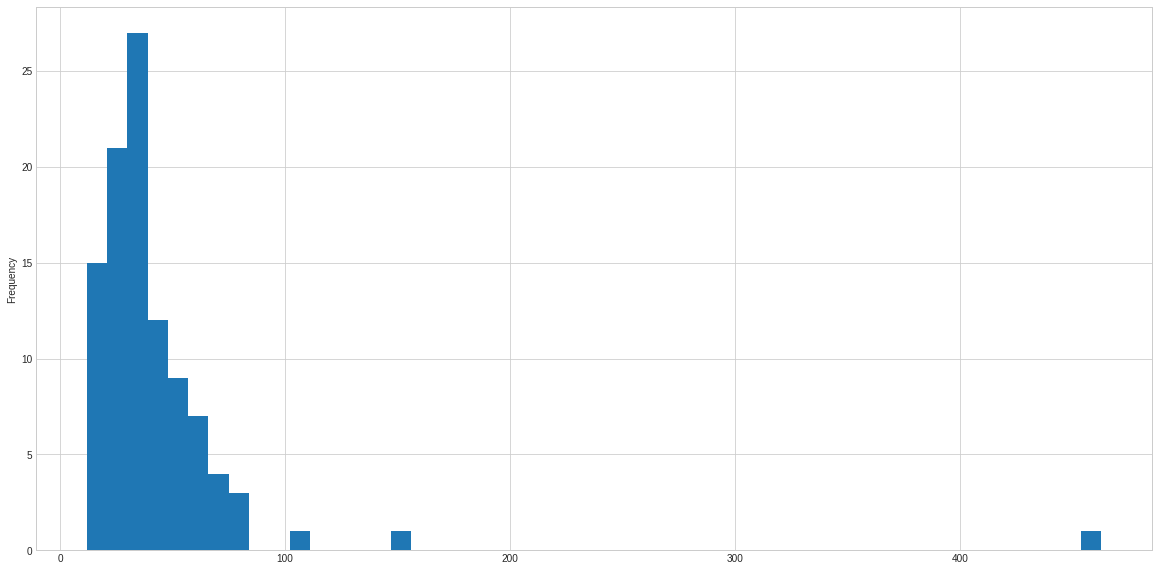

In [517]:
lastdata['incidence'].plot.hist(bins=50, figsize=(20, 10))

In [518]:
closeto50Lastdata = lastdata.loc[(lastdata.incidence > 45) & (lastdata.incidence < 55)]
closeto50Lastdata

,dep,date,index,P,T,cl_age90,pop,0,P0_9,P10_19,P20_29,P30_39,P40_49,P50_59,P60_69,P70_79,P80_89,P90+,rolling_new_cases,rolling_new_tests,sum_new_cases14,rolling_P0_9_cases,rolling_P10_19_cases,departement,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans.1,20 à 39 ans.1,40 à 59 ans.1,60 à 74 ans.1,75 ans et plus.1,Total.1,0 à 19 ans.2,20 à 39 ans.2,40 à 59 ans.2,60 à 74 ans.2,75 ans et plus.2,Total.2,Over75_perc,rolling_positive_rate,incidence14,incidence,incidence14Progression,I14ChangeSinceLastWeek%,incidence0_19
37997,69,2021-10-04,436721,205,15108,0,2e+06,205,26,34,37,30,31,15,16,9,5,2,146,14043,2173,21,2e+01,Rhône,481932,528113,460726,262004,159978,2e+06,244493,256832,226891,119544,62084,909844,237439,271281,233835,142460,97894,982909,8,1e+00,115,54,-58,-19,66
10165,26,2021-10-04,155561,52,3711,0,5e+05,52,3,6,6,11,9,6,6,4,1,0,40,3418,688,4,6e+00,Drôme,125320,110972,135233,96171,55426,5e+05,64213,55135,66070,45268,22133,252819,61107,55837,69163,50903,33293,270303,11,1e+00,132,53,-53,-29,54
14141,30,2021-10-04,193049,82,6048,0,7e+05,82,4,12,10,14,9,9,4,9,8,3,54,5409,840,7,8e+00,Gard,170044,153439,195319,149855,82026,8e+05,87263,76136,94388,70893,33015,361695,82781,77303,100931,78962,49011,388988,11,1e+00,112,50,-99,-29,61
43109,77,2021-10-04,486705,128,10595,0,1e+06,128,13,13,22,27,17,18,9,6,2,1,100,10045,1439,13,2e+01,Seine-et-Marne,393268,358575,382426,204529,93677,1e+06,201088,174068,186572,96977,36914,695619,192180,184507,195854,107552,56763,736856,6,1e+00,100,49,-59,-25,52
24933,48,2021-10-04,305513,19,455,0,8e+04,19,9,4,1,3,1,1,0,0,0,0,5,342,62,2,9e-01,Lozère,15589,14655,20239,16416,9631,8e+04,8222,7450,10406,8281,3911,38270,7367,7205,9833,8135,5720,38260,13,2e+00,81,48,5,21,116
30613,57,2021-10-04,361745,99,9305,0,1e+06,99,7,19,15,12,17,7,9,5,6,2,71,8462,1165,8,1e+01,Moselle,230594,243393,278210,191457,94786,1e+06,118778,123122,138025,90731,36823,507479,111816,120271,140185,100726,57963,530961,9,8e-01,112,48,-64,-26,58
25501,49,2021-10-04,311761,62,4660,0,8e+05,62,3,4,3,8,5,6,9,18,5,1,56,3922,780,7,5e+00,Maine-et-Loire,203420,186437,205056,141032,83583,8e+05,104144,92217,102156,67077,32838,398432,99276,94220,102900,73955,50745,421096,10,1e+00,95,48,6,6,42


In [519]:
closeto50LastdataDeps = closeto50Lastdata.dep.unique()

closeto50LastdataDeps = sorted(closeto50LastdataDeps)
closeto50LastdataDeps

['26', '30', '48', '49', '57', '69', '77']

In [520]:
cset = set(closeto50LastdataDeps)
rset = set(over50deps)

In [521]:
cset & rset

{'48', '69'}

In [522]:
cset - rset

{'26', '30', '49', '57', '77'}

In [523]:
maskInPrimarySchoolDeps = cset & rset
noMaskInPrimarySchoolDeps = cset - rset

In [524]:
minDate = "2021-09-26"


In [525]:


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    #subplot_titles=(" Tests", )
    )

for dep in maskInPrimarySchoolDeps:
  depds = newdf.loc[(newdf.dep == dep) & (newdf.date > minDate)]
  label = "Masked " + depds.at[depds.index.max(), 'departement']

  fig.add_trace(go.Scatter(x=depds.date, y=(depds['incidence0_19']), 
                           name=label,  hovertext='label', mode='lines+markers'
                    ),
              1, 1, secondary_y=False)
  
for dep in noMaskInPrimarySchoolDeps:
  depds = newdf.loc[(newdf.dep == dep) & (newdf.date > minDate)]
  label = "Not Masked " + depds.at[depds.index.max(), 'departement']

  fig.add_trace(go.Scatter(x=depds.date, y=(depds['incidence0_19']), name=label,  hovertext='label', mode='lines',
                    ),
              1, 1, secondary_y=False)
  
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Masked",
                  width=1000, height=600)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()



In [526]:
depds = newdf.loc[(newdf.dep == '69') & (newdf.date > minDate)]

depds.loc[:, ["date", "dep", "incidence0_19", "rolling_P0_9_cases", "rolling_P10_19_cases", "0 à 19 ans"]]


,date,dep,incidence0_19,rolling_P0_9_cases,rolling_P10_19_cases,0 à 19 ans
37990,2021-09-27,69,75,25,27,481932
37991,2021-09-28,69,77,24,28,481932
37992,2021-09-29,69,75,24,28,481932
37993,2021-09-30,69,76,24,28,481932
37994,2021-10-01,69,72,23,27,481932
...,...,...,...,...,...,...
38051,2021-11-27,69,540,208,164,481932
38052,2021-11-28,69,546,210,166,481932
38053,2021-11-29,69,620,237,190,481932
38054,2021-11-30,69,670,259,202,481932


In [527]:


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    #subplot_titles=(" Tests", )
    )

for dep in maskInPrimarySchoolDeps:
  depds = newdf.loc[(newdf.dep == dep) & (newdf.date > minDate)]
  label = "Masked " + depds.at[depds.index.max(), 'departement']

  fig.add_trace(go.Scatter(x=depds.date, y=(depds['incidence']), 
                           name=label,  hovertext='label', mode='lines+markers'
                    ),
              1, 1, secondary_y=False)
  
for dep in noMaskInPrimarySchoolDeps:
  depds = newdf.loc[(newdf.dep == dep) & (newdf.date > minDate)]
  label = "Not Masked " + depds.at[depds.index.max(), 'departement']

  fig.add_trace(go.Scatter(x=depds.date, y=(depds['incidence']), name=label,  hovertext='label', mode='lines',
                    ),
              1, 1, secondary_y=False)
  
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Masked",
                  width=1000, height=600)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()



In [528]:


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    #subplot_titles=(" Tests", )
    )

for dep in noMaskInPrimarySchoolDeps:
  depds = newdf.loc[(newdf.dep == dep) & (newdf.date > "2021-10-04")]
  label = depds.at[depds.index.max(), 'departement']

  fig.add_trace(go.Scatter(x=depds.date, y=(depds['rolling_P0_9_cases'] / depds['rolling_new_cases'] *100), name=label,  hovertext='label', mode='lines',
                    ),
              1, 1, secondary_y=False)
  
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  yaxis=dict(
                        title='Number of ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Not Masked",
                  width=800, height=400)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()



# Vaccins
https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19/

Données par classes d'âge
Fichiers avec le nombre de personnes ayant reçu au moins une dose ou complètement vaccinées, par classes d’âge, arrêté à la dernière date disponible :

vacsi-tot-a-fra-YYYY-MM-DD-HHhmm.csv (échelle nationale)

vacsi-tot-a-reg-YYYY-MM-DD-HHhmm.csv (échelle régionale)


vacsi-tot-a-dep-YYYY-MM-DD-HHhmm.csv (échelle départementale)

Les classes d'âge utilisées sont les suivantes :


```


0 : Tous âges
04 : 0-4
09 : 5-9
11 : 10-11
17 : 12-17
24 : 18-24
29 : 25-29
39 : 30-39
49 : 40-49
59 : 50-59
64 : 60-64
69 : 65-69
74 : 70-74
79 : 75-79
80 : 80 et +
```





```
P0_9	P10_19	P20_29	P30_39	P40_49	P50_59	P60_69	P70_79	P80_89	P90```



## Vaccinations National

In [635]:
# National
vac_ageURL = "https://www.data.gouv.fr/fr/datasets/r/dc103057-d933-4e4b-bdbf-36d312af9ca9"

s = requests.get(vac_ageURL).content
sp_vac_age_ds = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=';')

sp_vac_age_ds

,fra,clage_vacsi,jour,n_tot_dose1,n_tot_complet,n_tot_rappel,pop,couv_tot_dose1,couv_tot_complet,couv_tot_rappel
0,FR,4,2021-12-02,4784,2599,137,4e+06,1e-01,1e-01,0e+00
1,FR,11,2021-12-02,16970,14989,93,2e+06,1e+00,9e-01,0e+00
2,FR,17,2021-12-02,3949422,3786652,6614,5e+06,8e+01,8e+01,1e-01
3,FR,24,2021-12-02,5024668,4860896,113692,5e+06,9e+01,9e+01,2e+00
4,FR,29,2021-12-02,3380533,3273932,117794,4e+06,9e+01,9e+01,3e+00
5,FR,39,2021-12-02,7252701,7060277,330361,8e+06,9e+01,9e+01,4e+00
6,FR,49,2021-12-02,7721407,7580121,529527,9e+06,9e+01,9e+01,6e+00
7,FR,59,2021-12-02,8128021,8019925,1060034,9e+06,9e+01,9e+01,1e+01
8,FR,9,2021-12-02,1921,671,22,4e+06,0e+00,0e+00,0e+00
9,FR,64,2021-12-02,3773794,3732096,780649,4e+06,9e+01,9e+01,2e+01


In [637]:
pd.set_option('precision',0)
maxdate = sp_vac_age_ds.jour.max()

latestdata = sp_vac_age_ds.loc[(sp_vac_age_ds.jour == maxdate) & (sp_vac_age_ds.clage_vacsi != 0)].copy()
latestdata = latestdata.sort_values(by='couv_tot_rappel', ascending=False)
subdf = latestdata.loc[: ,['clage_vacsi', 'jour', 'couv_tot_dose1',	'couv_tot_complet',	'couv_tot_rappel']]
s = subdf.style.bar(subset=['couv_tot_dose1',	'couv_tot_complet',	'couv_tot_rappel'], align='mid', color=['#d65f5f', '#5fba7d'])
s

,clage_vacsi,jour,couv_tot_dose1,couv_tot_complet,couv_tot_rappel
12,79,2021-12-02,98,97,61
13,80,2021-12-02,87,85,51
11,74,2021-12-02,99,98,48
10,69,2021-12-02,91,90,30
9,64,2021-12-02,92,91,19
7,59,2021-12-02,92,91,12
6,49,2021-12-02,90,88,6
5,39,2021-12-02,87,85,4
4,29,2021-12-02,91,88,3
3,24,2021-12-02,93,90,2


In [632]:
sp_vac_age_ds.rename(columns={'jour':'date'}, inplace=True)
vac_ds = sp_vac_age_ds.loc[(sp_vac_age_ds.date == "2021-11-30")]
vac_ds

,fra,date,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
338,FR,2021-11-30,23362,28355,494141,51965753,50865732,8188692,90,88,14


## Vaccinations par département

In [529]:
vac_ageURL = "https://www.data.gouv.fr/fr/datasets/r/83cbbdb9-23cb-455e-8231-69fc25d58111"


s = requests.get(vac_ageURL).content
sp_vac_age_ds = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=';')

sp_vac_age_ds

,dep,clage_vacsi,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
0,1,4,2020-12-27,0,0,0,0,0,0,0,0,0
1,1,4,2020-12-28,0,0,0,0,0,0,0,0,0
2,1,4,2020-12-29,0,0,0,0,0,0,0,0,0
3,1,4,2020-12-30,0,0,0,0,0,0,0,0,0
4,1,4,2020-12-31,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
523750,978,0,2021-11-26,16,34,89,13545,12273,860,38,35,2
523751,978,0,2021-11-27,0,0,0,13545,12273,860,38,35,2
523752,978,0,2021-11-28,0,2,0,13545,12275,860,38,35,2
523753,978,0,2021-11-29,20,41,136,13565,12316,996,38,35,3


In [ ]:
sp_vac_age_ds.rename(columns={'jour':'date'}, inplace=True)

In [530]:
deps_age = sp_vac_age_ds.dep.unique()
deps_age

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       21, 22, 23, 24, 25, 26, 27, 28, 29, '29', '2A', '2B', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 971, '971', '972', '973', '974', '976', '977', '978', '01',
       '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24',
       '25', '26', '27', '28', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87

In [531]:
sp_vac_age_ds.dep = sp_vac_age_ds.dep.astype('string') 

In [532]:
sp_vac_age_ds.rename(columns={'jour':'date'}, inplace=True)

In [533]:
deps_age = sp_vac_age_ds.clage_vacsi.unique()
deps_age

array([ 4, 11, 17, 24, 29, 39, 49,  9, 59, 64, 69, 74, 79, 80,  0])

In [534]:
sp_vac_age_ds.dtypes

dep               string
clage_vacsi        int64
date              object
n_dose1            int64
n_complet          int64
n_rappel           int64
n_cum_dose1        int64
n_cum_complet      int64
n_cum_rappel       int64
couv_dose1       float64
couv_complet     float64
couv_rappel      float64
dtype: object

In [535]:
bdr_vac_ds = sp_vac_age_ds.loc[(sp_vac_age_ds.dep == '13') & (sp_vac_age_ds.date == "2021-11-30")]
bdr_vac_ds

,dep,clage_vacsi,date,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
57290,13,4,2021-11-30,1,0,0,150,71,1,1e-01,1e-01,0e+00
57629,13,11,2021-11-30,2,0,0,377,331,1,8e-01,7e-01,0e+00
57968,13,17,2021-11-30,98,79,12,84347,80461,157,6e+01,6e+01,1e-01
58307,13,24,2021-11-30,114,142,384,133814,127763,2015,8e+01,8e+01,1e+00
58646,13,29,2021-11-30,120,136,358,94106,89989,2289,8e+01,8e+01,2e+00
58985,13,39,2021-11-30,191,259,1049,206177,198810,6752,8e+01,8e+01,3e+00
59324,13,49,2021-11-30,154,163,1918,225721,220074,12508,9e+01,9e+01,5e+00
59663,13,9,2021-11-30,1,0,0,88,38,0,1e-01,0e+00,0e+00
60002,13,59,2021-11-30,115,115,2824,242266,237966,25466,9e+01,9e+01,1e+01
60341,13,64,2021-11-30,41,30,1810,110133,108570,20170,9e+01,9e+01,2e+01


In [629]:
pd.set_option('precision',0)
maxdate = bdr_vac_ds.date.max()

latestdata = bdr_vac_ds.loc[bdr_vac_ds.date == maxdate].copy()
latestdata = latestdata.sort_values(by='couv_rappel', ascending=False)
subdf = latestdata.loc[: ,['dep', 'clage_vacsi', 'date', 'couv_dose1',	'couv_complet',	'couv_rappel']]
s = subdf.style.bar(subset=['couv_dose1',	'couv_complet', 'couv_rappel'], align='mid', color=['#d65f5f', '#5fba7d'])
s

,dep,clage_vacsi,date,couv_dose1,couv_complet,couv_rappel
61358,13,79,2021-11-30,92,90,53
61697,13,80,2021-11-30,84,81,44
61019,13,74,2021-11-30,93,92,43
60680,13,69,2021-11-30,87,86,30
60341,13,64,2021-11-30,91,90,17
493244,13,0,2021-11-30,72,70,12
60002,13,59,2021-11-30,91,90,10
59324,13,49,2021-11-30,88,86,5
58985,13,39,2021-11-30,81,78,3
58646,13,29,2021-11-30,83,80,2


In [537]:
maxdate

'2021-11-30'

In [538]:
vacURL = 'https://www.data.gouv.fr/fr/datasets/r/eb672d49-7cc7-4114-a5a1-fa6fd147406b'

s = requests.get(vacURL).content
sp_vac_ds = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=',')

sp_vac_ds


,date,code,nom,total_vaccines
0,2021-01-11,REG-01,Guadeloupe,96
1,2021-01-11,REG-02,Martinique,283
2,2021-01-11,REG-03,Guyane,0
3,2021-01-11,REG-04,La Réunion,0
4,2021-01-11,REG-06,Mayotte,0
...,...,...,...,...
283,2021-01-26,REG-75,Nouvelle-Aquitaine,129133
284,2021-01-26,REG-76,Occitanie,117357
285,2021-01-26,REG-84,Auvergne-Rhône-Alpes,132511
286,2021-01-26,REG-93,Provence-Alpes-Côte d'Azur,92491


In [539]:
sp_vac_ds.nom.unique()

array(['Guadeloupe', 'Martinique', 'Guyane', 'La Réunion', 'Mayotte',
       'Île-de-France', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté',
       'Normandie', 'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Occitanie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur", 'Corse'],
      dtype=object)

In [540]:
sp_vac_ds[sp_vac_ds.nom == "Provence-Alpes-Côte d'Azur"]

,date,code,nom,total_vaccines
16,2021-01-11,REG-93,Provence-Alpes-Côte d'Azur,6951
34,2021-01-12,REG-93,Provence-Alpes-Côte d'Azur,11392
52,2021-01-13,REG-93,Provence-Alpes-Côte d'Azur,14769
70,2021-01-14,REG-93,Provence-Alpes-Côte d'Azur,21372
88,2021-01-15,REG-93,Provence-Alpes-Côte d'Azur,25510
106,2021-01-16,REG-93,Provence-Alpes-Côte d'Azur,28408
124,2021-01-17,REG-93,Provence-Alpes-Côte d'Azur,29322
142,2021-01-18,REG-93,Provence-Alpes-Côte d'Azur,33262
160,2021-01-19,REG-93,Provence-Alpes-Côte d'Azur,45978
178,2021-01-20,REG-93,Provence-Alpes-Côte d'Azur,51207


# Covid-19 : résultats nationaux issus des appariements entre SI-VIC, SI-DEP et VAC-SI

https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/export/?disjunctive.vac_statut

Licence Ouverte v2.0 (Etalab)

Producteur: DREES/OSAM
Attributions: SI-VIC, SI-DEP, VAC-SI



In [572]:
szSiVacURL = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/download/?format=csv&timezone=Europe/London&lang=fr&use_labels_for_header=true&csv_separator=%3B"


s = requests.get(szSiVacURL).content
sp_si_vac_ds = pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=';')

sp_si_vac_ds


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,2021-09-06,Complet de 6 mois et plus - avec rappel,4e-01,0,0e+00,0e+00,0e+00,0e+00,0e+00,0e+00,0e+00,0e+00,1
1,2021-09-07,Complet de 6 mois et plus - avec rappel,2e+01,3,1e-01,6e-02,0e+00,0e+00,0e+00,0e+00,0e+00,0e+00,3749
2,2021-09-09,Complet de 6 mois et plus - avec rappel,1e+02,8,1e-01,3e-02,1e-02,0e+00,5e-02,0e+00,0e+00,0e+00,32769
3,2021-09-10,Complet de 6 mois et plus - avec rappel,2e+02,9,4e+00,4e-01,6e-02,6e-02,0e+00,0e+00,0e+00,0e+00,56642
4,2021-09-12,Complet de 6 mois et plus - avec rappel,7e+01,3,1e+00,1e-02,0e+00,0e+00,3e-01,0e+00,0e+00,0e+00,95606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2021-10-29,Complet de 6 mois et plus - avec rappel,4e+03,455,6e+01,2e+01,7e+00,6e+00,2e+00,1e+00,0e+00,0e+00,2081294
1440,2021-11-02,Complet de 6 mois et plus - avec rappel,9e+03,542,9e+01,2e+01,1e+01,6e+00,3e+00,1e+00,4e+00,3e+00,2325637
1441,2021-11-03,Complet de 6 mois et plus - avec rappel,6e+03,554,7e+01,2e+01,4e+00,2e+00,5e-02,5e-02,2e-01,2e-01,2414957
1442,2021-11-09,Complet de 6 mois et plus - avec rappel,7e+03,814,7e+01,2e+01,8e+00,7e+00,1e+00,1e+00,3e+00,3e+00,2802676


In [573]:
sp_si_vac_ds.dtypes

date              object
vac_statut        object
nb_PCR           float64
nb_PCR_sympt     float64
nb_PCR+          float64
nb_PCR+_sympt    float64
HC               float64
HC_PCR+          float64
SC               float64
SC_PCR+          float64
DC               float64
DC_PCR+          float64
effectif           int64
dtype: object

In [574]:
sorted(sp_si_vac_ds.vac_statut.unique())

['Complet de 6 mois et plus - avec rappel',
 'Complet de 6 mois et plus - sans rappel',
 'Complet de moins de 3 mois - avec rappel',
 'Complet de moins de 3 mois - sans rappel',
 'Complet entre 3 mois et 6 mois - avec rappel',
 'Complet entre 3 mois et 6 mois - sans rappel',
 'Non-vaccinés',
 'Primo dose efficace',
 'Primo dose récente']

In [576]:
multi_status_list = [['Non-vaccinés', "Unvaccinated"],
                       ['Primo dose récente', "First Dose Recent"],
                       ['Primo dose efficace', "First Dose efficient"],
                       ['Complet de moins de 3 mois - sans rappel', "Fully Vaccinated less than 3 months ago - without booster"],
                       ['Complet de moins de 3 mois - avec rappel', "Fully Vaccinated less than 3 months ago - with booster"],
                       ['Complet entre 3 mois et 6 mois - sans rappel', "Fully Vaccinated between 3 and 6 months ago - without booster"],
                       ['Complet entre 3 mois et 6 mois - avec rappel', "Fully Vaccinated between 3 and 6 months ago - with booster"],
                       ['Complet de 6 mois et plus - sans rappel', "Fully Vaccinated 6 months of more ago - without booster"],
                       ['Complet de 6 mois et plus - avec rappel', "Fully Vaccinated 6 months of more ago - with booster"]
                     ]


In [577]:
multi_status_list

[['Non-vaccinés', 'Unvaccinated'],
 ['Primo dose récente', 'First Dose Recent'],
 ['Primo dose efficace', 'First Dose efficient'],
 ['Complet de moins de 3 mois - sans rappel',
  'Fully Vaccinated less than 3 months ago - without booster'],
 ['Complet de moins de 3 mois - avec rappel',
  'Fully Vaccinated less than 3 months ago - with booster'],
 ['Complet entre 3 mois et 6 mois - sans rappel',
  'Fully Vaccinated between 3 and 6 months ago - without booster'],
 ['Complet entre 3 mois et 6 mois - avec rappel',
  'Fully Vaccinated between 3 and 6 months ago - with booster'],
 ['Complet de 6 mois et plus - sans rappel',
  'Fully Vaccinated 6 months of more ago - without booster'],
 ['Complet de 6 mois et plus - avec rappel',
  'Fully Vaccinated 6 months of more ago - with booster']]

In [578]:
multi_status_pd = pd.DataFrame(multi_status_list, columns=["French", "English"])
multi_status_pd

,French,English
0,Non-vaccinés,Unvaccinated
1,Primo dose récente,First Dose Recent
2,Primo dose efficace,First Dose efficient
3,Complet de moins de 3 mois - sans rappel,Fully Vaccinated less than 3 months ago - with...
4,Complet de moins de 3 mois - avec rappel,Fully Vaccinated less than 3 months ago - with...
5,Complet entre 3 mois et 6 mois - sans rappel,Fully Vaccinated between 3 and 6 months ago - ...
6,Complet entre 3 mois et 6 mois - avec rappel,Fully Vaccinated between 3 and 6 months ago - ...
7,Complet de 6 mois et plus - sans rappel,Fully Vaccinated 6 months of more ago - withou...
8,Complet de 6 mois et plus - avec rappel,Fully Vaccinated 6 months of more ago - with b...


In [579]:
vac_statut_list = multi_status_pd["French"].to_numpy()

In [580]:
sp_si_vac_ds.describe()

,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
count,1444,1444,1444,1444,1e+03,1e+03,1444,1444,1444,1444,1e+03
mean,21353,2067,983,427,4e+01,3e+01,10,8,5,4,8e+06
std,29803,3309,2216,1024,7e+01,5e+01,21,16,10,7,1e+07
min,0,0,0,0,0e+00,0e+00,0,0,0,0,1e+00
25%,347,18,4,1,2e-02,1e-02,0,0,0,0,2e+05
50%,7475,526,158,55,1e+01,7e+00,2,1,1,1,3e+06
75%,33360,2575,979,400,4e+01,3e+01,9,7,6,4,2e+07
max,173125,21216,18910,9192,5e+02,3e+02,145,111,78,46,4e+07


date
Jour du prélèvement (tests), de l'admission (hospitalisations) ou du décès 

vac_statut: Statut vaccinal le jour du tests, de l'admission ou du décès (afin de tenir compte des délais d'incubation)
Nom (identifiant)	vac_statut
Type	texte
Exemple	
Complet de 6 mois et plus - avec rappel

nb_PCR: Nombre de tests PCR prélevés
Nom (identifiant)	nb_pcr
Type	décimal
Exemple	
0.38

nb_PCR_sympt: Nombre de tests PCR prélevés où le patient est déclaré symptomatique
Nom (identifiant)	nb_pcr_sympt
Type	décimal
Exemple	
0

nb_PCR+: Nombre de tests PCR positifs prélevés
Nom (identifiant)	nb_pcr0
Type	décimal
Exemple	
0

nb_PCR+_sympt: Nombre de tests PCR positifs prélevés où le patient est déclaré symptomatique
Nom (identifiant)	nb_pcr_sympt0
Type	décimal
Exemple	
0

HC: 
Nombre d'entrées de patients en hospitalisation complète
Nom (identifiant)	hc
Type	décimal
Exemple	
0

HC_PCR+: 
Nombre d'entrées de patients en hospitalisation complète pour lesquels un test PCR positif a été identifié
Nom (identifiant)	hc_pcr
Type	décimal
Exemple	
0

SC: 
Nombre d'entrées en soins critiques
Nom (identifiant)	sc
Type	décimal
Exemple	
0

SC_PCR+: 
Nombre d'entrées de patients en soins critiques pour lesquels un test PCR positif a été identifié
Nom (identifiant)	sc_pcr
Type	décimal
Exemple	
0

DC: Nombre de décès de patients hospitalisés 
Nom (identifiant)	dc
Type	décimal
Exemple	
0

DC_PCR+: 
Nombre de décès de patients hospitalisés pour lesquels un test PCR positif a été identifié
Nom (identifiant)	dc_pcr
Type	décimal
Exemple	
0

effectif: 
Population résidente selon statut vaccinal
Nom (identifiant)	effectif
Type	int
Exemple	
1

In [581]:
sp_si_vac_ds = sp_si_vac_ds.sort_values(by='date', ascending=True)

In [582]:
subset = sp_si_vac_ds.loc [sp_si_vac_ds.vac_statut == 'Complet de 6 mois et plus - avec rappel']
#subset = subset.sort_values(by='date', ascending=True)


In [612]:

fig = go.Figure()

i = 0
for statut in vac_statut_list:
  subset = sp_si_vac_ds.loc [sp_si_vac_ds.vac_statut == statut]
  fig.add_trace(go.Bar(x=subset.date, y=subset['effectif'], name=('Total: ' + multi_status_pd.at[i, "English"]),  
                       hovertext=multi_status_pd.at[i, "English"]))
  i = i + 1


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Total Population ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1000, height=500)
fig.show()

In [584]:
# Calculate rolling 7 days average of each metric and per 100,000 people rate
numColumns = ['nb_PCR', 'nb_PCR_sympt', 'nb_PCR+',
       'nb_PCR+_sympt', 'HC', 'HC_PCR+', 'SC', 'SC_PCR+', 'DC', 'DC_PCR+']

subsets = []
for statut in vac_statut_list:
  subset = sp_si_vac_ds.loc [sp_si_vac_ds.vac_statut == statut]
  for label in numColumns:
    subset[label + "_rolling"] = subset[label].rolling(window=rollingWindow).mean()
    subset[label + "_per_one_hundred_thousands"] = subset[label + "_rolling"] * 100000 / subset['effectif']
  subsets.append(subset)

newdf = pd.concat(subsets, keys=vac_statut_list)
newdf = newdf.reset_index() 

In [613]:

fig = go.Figure()

for statut in ['Complet de moins de 3 mois - sans rappel']:
  subset = newdf.loc [newdf.vac_statut == statut]
  fig.add_trace(go.Trace(x=subset.date, y=(subset['DC_PCR+']  * 100000 / subset['effectif']), name=('Deaths: ' + statut),  hovertext='label'),
                )
  fig.add_trace(go.Trace(x=subset.date, y=(subset['DC_PCR+_per_one_hundred_thousands']), name=('Deaths Rolling: ' + statut),  hovertext='label'),
                )

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Deaths per 100,000 people ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1000, height=500)
fig.show()

In [614]:

fig = go.Figure()

for statut in ['Complet de moins de 3 mois - sans rappel']:
  subset = newdf.loc [newdf.vac_statut == statut]
  fig.add_trace(go.Trace(x=subset.date, y=(subset['nb_PCR+']  * 100000 / subset['effectif']), name=('Positif: ' + statut),  hovertext='label'))
  fig.add_trace(go.Trace(x=subset.date, y=subset['nb_PCR+_per_one_hundred_thousands'], name=('Positif rolling: ' + statut),  hovertext='label'))



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Deaths per 100,000 people ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1000, height=500)
fig.show()

In [615]:

fig = go.Figure()
i = 0 

for statut in vac_statut_list:
  subset = newdf.loc [newdf.vac_statut == statut]
  #fig.add_trace(go.Trace(x=subset.date, y=(subset['nb_PCR+']  * 100000 / subset['effectif']), name=('Positif: ' + statut),  hovertext='label'))
  fig.add_trace(go.Trace(x=subset.date, y=subset['nb_PCR+_per_one_hundred_thousands'], name=('Positives: ' + multi_status_pd.at[i, "English"]),  
                         hovertext=multi_status_pd.at[i, "English"]))
  i = i+1



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Positive jabs per 100,000 people (7 day average)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1200, height=500)
fig.show()

In [616]:

fig = go.Figure()
i = 0 

for statut in vac_statut_list:
  subset = newdf.loc [newdf.vac_statut == statut]
  #fig.add_trace(go.Trace(x=subset.date, y=(subset['nb_PCR+']  * 100000 / subset['effectif']), name=('Positif: ' + statut),  hovertext='label'))
  fig.add_trace(go.Trace(x=subset.date, y=subset['DC_PCR+_per_one_hundred_thousands'], name=('Deaths: ' + multi_status_pd.at[i, "English"]),  
                         hovertext=multi_status_pd.at[i, "English"]))
  i = i+1



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Deaths per 100,000 people (7 day average)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1200, height=500)
fig.show()

TODO
Ignore when Effectif below X


In [617]:
multi_status_pd[ "English"].to_numpy()

array(['Unvaccinated', 'First Dose Recent', 'First Dose efficient',
       'Fully Vaccinated less than 3 months ago - without booster',
       'Fully Vaccinated less than 3 months ago - with booster',
       'Fully Vaccinated between 3 and 6 months ago - without booster',
       'Fully Vaccinated between 3 and 6 months ago - with booster',
       'Fully Vaccinated 6 months of more ago - without booster',
       'Fully Vaccinated 6 months of more ago - with booster'],
      dtype=object)

In [618]:
fig = make_subplots(
    rows=9, cols=1,
    specs=[[{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}]],
    subplot_titles=(multi_status_pd[ "English"].to_numpy()))

i = 0
for statut in vac_statut_list:
  subset = newdf.loc [newdf.vac_statut == statut]
  fig.add_trace(go.Trace(x=subset.date, y=(subset['DC_PCR+_per_one_hundred_thousands']), name=('deaths: ' + statut),  hovertext='label'),
                (i+1), 1)
  fig.add_trace(go.Trace(x=subset.date, y=subset['effectif'], name=('Pop: ' + statut),  hovertext='label'), 
                (i+1), 1, secondary_y=True)
  i = i+1



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='pop ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1000, height=2500)
fig.show()

## Nullify metric when population smaller than minimum
if effectif < minEffectif : subset['DC_PCR+_per_one_hundred_thousands'] = None


In [619]:
minEffectif = 500000


In [620]:
def min_effectif(row):
  if (row.effectif < minEffectif):
    for label in numColumns:
      row[label + "_per_one_hundred_thousands"] = None
  return row

newdf = newdf.apply(min_effectif, axis='columns')

In [621]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("c"))

for statut in ['Complet entre 3 mois et 6 mois - avec rappel']:
  subset = newdf.loc [newdf.vac_statut == statut]

  fig.add_trace(go.Trace(x=subset.date, y=(subset['DC_PCR+']  * 100000 / subset['effectif']), name=('Deaths: ' + statut),  hovertext='label'),
                )
  fig.add_trace(go.Trace(x=subset.date, y=(subset['DC_PCR+_per_one_hundred_thousands']), name=('Deaths Rolling: ' + statut),  hovertext='label'),
                  )
  fig.add_trace(go.Trace(x=subset.date, y=(subset['effectif']), name=('Effectif: ' + statut),  hovertext='label'),
                  secondary_y=True)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Deaths per 100,000 people ',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1000, height=500)
fig.show()

In [622]:
short_vaccin_status_pd = multi_status_pd.iloc[[0, 3, 5, 7, 8]]
short_vaccin_status_pd

,French,English
0,Non-vaccinés,Unvaccinated
3,Complet de moins de 3 mois - sans rappel,Fully Vaccinated less than 3 months ago - with...
5,Complet entre 3 mois et 6 mois - sans rappel,Fully Vaccinated between 3 and 6 months ago - ...
7,Complet de 6 mois et plus - sans rappel,Fully Vaccinated 6 months of more ago - withou...
8,Complet de 6 mois et plus - avec rappel,Fully Vaccinated 6 months of more ago - with b...


In [623]:
numColumns

['nb_PCR',
 'nb_PCR_sympt',
 'nb_PCR+',
 'nb_PCR+_sympt',
 'HC',
 'HC_PCR+',
 'SC',
 'SC_PCR+',
 'DC',
 'DC_PCR+']

In [624]:

fig = go.Figure()

for i in short_vaccin_status_pd.index:
  subset = newdf.loc [newdf.vac_statut == short_vaccin_status_pd.at[i, "French"]]
  fig.add_trace(go.Trace(x=subset.date, y=subset['DC_PCR+_per_one_hundred_thousands'], name=('Deaths: ' + short_vaccin_status_pd.at[i, "English"]),  
                         hovertext=short_vaccin_status_pd.at[i, "English"]))
  




fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Deaths per 100,000 people (7 day average)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1200, height=500)
fig.show()

In [625]:

fig = go.Figure()

for i in short_vaccin_status_pd.index:
  subset = newdf.loc [newdf.vac_statut == short_vaccin_status_pd.at[i, "French"]]
  fig.add_trace(go.Trace(x=subset.date, y=subset['nb_PCR+_per_one_hundred_thousands'], name=('Positive: ' + short_vaccin_status_pd.at[i, "English"]),  
                         hovertext=short_vaccin_status_pd.at[i, "English"]))
  

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Positive tests per 100,000 people (7 day average)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1200, height=500)
fig.show()

In [626]:

fig = go.Figure()

for i in short_vaccin_status_pd.index:
  subset = newdf.loc [newdf.vac_statut == short_vaccin_status_pd.at[i, "French"]]
  fig.add_trace(go.Trace(x=subset.date, y=subset['HC_per_one_hundred_thousands'], name=('Hospitalisation: ' + short_vaccin_status_pd.at[i, "English"]),  
                         hovertext=short_vaccin_status_pd.at[i, "English"]))
  

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='Hospitalisation per 100,000 people (7 day average)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1200, height=500)
fig.show()

In [627]:

fig = go.Figure()

for i in short_vaccin_status_pd.index:
  subset = newdf.loc [newdf.vac_statut == short_vaccin_status_pd.at[i, "French"]]
  fig.add_trace(go.Trace(x=subset.date, y=subset['SC_per_one_hundred_thousands'], name=('ICU: ' + short_vaccin_status_pd.at[i, "English"]),  
                         hovertext=short_vaccin_status_pd.at[i, "English"]))
  

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  showlegend=True,
                  barmode='stack',
                  yaxis=dict(
                        title='ICU entries per 100,000 people (7 day average)',
                        titlefont_size=16,
                        tickfont_size=14,
                    ),
                  #yaxis_type="log",
                  title_text="Covid-19                 Source: covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si",
                  width=1200, height=500)
fig.show()